# Package Import

In [1]:
#data handling
import pandas as pd
import numpy as np

#for the yeo-johnson transformation
import scipy.stats as stats

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
data_features = pd.read_csv("/Users/afanzott/Documents/RHI_Data_Science/research_notebooks/data/md_raw_dataset.csv", sep=";", index_col=False)

#rename first column
data_features.rename(columns = {"Unnamed: 0":"index"}, inplace=True)

#get column information
print(data_features.columns)

# rows and columns of the data
print(data_features.shape)

#get first 5 rows
data_features.head(5)

Index(['index', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'Unnamed: 7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'Unnamed: 17',
       'etherium_before_start', 'expected_start', 'start_process',
       'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon',
       'pure_seastone', 'crystal_supergroup', 'Cycle', 'groups'],
      dtype='object')
(9592, 35)


,index,when,super_hero_group,tracking,place,tracking_times,crystal_type,Unnamed: 7,human_behavior_report,human_measure,crystal_weight,expected_factor_x,previous_factor_x,first_factor_x,expected_final_factor_x,final_factor_x,previous_adamantium,Unnamed: 17,etherium_before_start,expected_start,start_process,start_subprocess1,start_critical_subprocess1,predicted_process_end,process_end,subprocess1_end,reported_on_tower,opened,chemical_x,raw_kryptonite,argon,pure_seastone,crystal_supergroup,Cycle,groups
0,0,09/07/2020,D,84921,1,1,group 27,2,3,650,345.2483,1616,1624.000000,1597.0,1577.0,1578.0,0.0650,1597.0,3.07599998,09/07/2020 13:10,09/07/2020 13:08,09/07/2020 13:11,09/07/2020 13:13,09/07/2020 13:41,09/07/2020 13:28,09/07/2020 13:27,09/07/2020 13:37,44021.58091,15.850000,693.0,0.0,49.51,0,2ª,0.0
1,1,09/07/2020,D,84941,1,1,group 56,1,4,700,350.6301,1610,1630.300049,1595.0,1565.0,1572.0,0.0309,1595.0,NaN,09/07/2020 15:08,09/07/2020 15:11,09/07/2020 15:16,09/07/2020 15:18,09/07/2020 15:49,09/07/2020 15:39,09/07/2020 15:38,09/07/2020 15:53,44021.6737,21.966667,3570.0,0.0,99.94,0,2ª,0.0
2,2,09/07/2020,D,84951,1,1,group 56,2,4,800,347.4298,1609,1638.099976,1608.0,1565.0,1568.0,NaN,1608.0,NaN,09/07/2020 16:15,09/07/2020 16:16,09/07/2020 16:20,09/07/2020 16:22,09/07/2020 16:54,09/07/2020 16:42,09/07/2020 16:41,09/07/2020 16:54,44021.70867,21.166667,7950.0,0.0,91.49,0,2ª,0.0
3,3,09/07/2020,D,84971,1,1,group 56,7,3,700,333.1576,1622,1614.099976,1587.0,1571.0,1576.0,0.0520,1587.0,NaN,09/07/2020 18:22,09/07/2020 18:24,09/07/2020 18:31,09/07/2020 18:33,09/07/2020 19:02,09/07/2020 18:47,09/07/2020 18:47,09/07/2020 18:55,09/07/2020 19:02,15.250000,807.0,0.0,NaN,0,2ª,0.0
4,4,09/07/2020,D,84981,1,1,group 27,17,3,700,362.3764,1620,1618.199951,1599.0,1579.0,1590.0,0.2800,1599.0,NaN,09/07/2020 19:14,09/07/2020 19:12,09/07/2020 19:16,NaN,09/07/2020 20:13,09/07/2020 19:37,09/07/2020 19:37,09/07/2020 19:47,09/07/2020 20:20,20.566667,NaN,0.0,509.19,0,2ª,0.0


In [3]:
target = pd.read_csv("/Users/afanzott/Documents/RHI_Data_Science/research_notebooks/data/md_target_dataset.csv", sep=";")

#get target information
print(target.columns)

# rows and columns of the data
print(target.shape)

#get first 5 entries
target.head(5)

Index(['index', 'groups', 'target'], dtype='object')
(9589, 3)


,index,groups,target
0,1,0,1.233766
1,2,0,2.467532
2,3,0,3.701299
3,4,0,4.935065
4,5,0,6.168831


# Data Preprocessing
First we need to create one dataframe out of the features and target via a join.

In [4]:
data_features.groups = data_features.groups.astype("int64", errors="ignore")

data_features = data_features.loc[~data_features.groups.isnull(), :]
data = pd.merge(data_features, target, how="inner", on=["groups","index"])

print(data_features.shape)
print(target.shape)
print(data.shape)

(9590, 35)
(9589, 3)
(8544, 36)


Some groups and index combinations are missing and two groups are NA. Therefore the resulting dataset is smaller, but we can still use the smaller one for training.

In [5]:
data.head(10)

,index,when,super_hero_group,tracking,place,tracking_times,crystal_type,Unnamed: 7,human_behavior_report,human_measure,crystal_weight,expected_factor_x,previous_factor_x,first_factor_x,expected_final_factor_x,final_factor_x,previous_adamantium,Unnamed: 17,etherium_before_start,expected_start,start_process,start_subprocess1,start_critical_subprocess1,predicted_process_end,process_end,subprocess1_end,reported_on_tower,opened,chemical_x,raw_kryptonite,argon,pure_seastone,crystal_supergroup,Cycle,groups,target
0,1,09/07/2020,D,84941,1,1,group 56,1,4,700,350.6301,1610,1630.300049,1595.0,1565.0,1572.0,0.0309,1595.0,NaN,09/07/2020 15:08,09/07/2020 15:11,09/07/2020 15:16,09/07/2020 15:18,09/07/2020 15:49,09/07/2020 15:39,09/07/2020 15:38,09/07/2020 15:53,44021.6737,21.966667,3570.0,0.000000,99.94,0,2ª,0.0,1.233766
1,2,09/07/2020,D,84951,1,1,group 56,2,4,800,347.4298,1609,1638.099976,1608.0,1565.0,1568.0,NaN,1608.0,NaN,09/07/2020 16:15,09/07/2020 16:16,09/07/2020 16:20,09/07/2020 16:22,09/07/2020 16:54,09/07/2020 16:42,09/07/2020 16:41,09/07/2020 16:54,44021.70867,21.166667,7950.0,0.000000,91.49,0,2ª,0.0,2.467532
2,3,09/07/2020,D,84971,1,1,group 56,7,3,700,333.1576,1622,1614.099976,1587.0,1571.0,1576.0,0.0520,1587.0,NaN,09/07/2020 18:22,09/07/2020 18:24,09/07/2020 18:31,09/07/2020 18:33,09/07/2020 19:02,09/07/2020 18:47,09/07/2020 18:47,09/07/2020 18:55,09/07/2020 19:02,15.250000,807.0,0.000000,NaN,0,2ª,0.0,3.701299
3,4,09/07/2020,D,84981,1,1,group 27,17,3,700,362.3764,1620,1618.199951,1599.0,1579.0,1590.0,0.2800,1599.0,NaN,09/07/2020 19:14,09/07/2020 19:12,09/07/2020 19:16,NaN,09/07/2020 20:13,09/07/2020 19:37,09/07/2020 19:37,09/07/2020 19:47,09/07/2020 20:20,20.566667,NaN,0.000000,509.19,0,2ª,0.0,4.935065
4,5,09/07/2020,B,84991,1,1,group 56,12,3,720,349.7962,1634,1640.500000,1617.0,1583.0,1589.0,0.0406,1617.0,NaN,09/07/2020 20:59,09/07/2020 20:59,09/07/2020 21:03,09/07/2020 21:04,09/07/2020 21:37,09/07/2020 21:35,09/07/2020 21:35,09/07/2020 21:51,09/07/2020 22:09,32.016667,1026.0,0.000000,127.79,0,2ª,0.0,6.168831
5,6,09/07/2020,B,85001,1,1,group 56,1,4,480,351.6399,1614,1632.199951,1601.0,1566.0,1573.0,0.0436,1601.0,NaN,09/07/2020 21:58,09/07/2020 22:03,09/07/2020 22:12,09/07/2020 22:15,09/07/2020 22:41,09/07/2020 22:34,09/07/2020 22:33,09/07/2020 22:44,09/07/2020 23:03,21.033333,3924.0,0.000000,60.18,0,2ª,0.0,7.402597
6,7,09/07/2020,B,85011,1,1,group 56,17,4,650,366.1621,1608,1605.099976,1591.0,1567.0,1574.0,0.0484,1591.0,NaN,09/07/2020 23:02,09/07/2020 23:02,09/07/2020 23:07,09/07/2020 23:13,09/07/2020 23:40,09/07/2020 23:24,09/07/2020 23:23,09/07/2020 23:34,10/07/2020 00:04,15.850000,2052.0,0.000000,NaN,0,2ª,0.0,8.636364
7,8,09/07/2020,B,85021,1,1,group 56,2,4,540,359.1497,1621,1626.000000,1602.0,1568.0,1576.0,0.0630,1602.0,NaN,09/07/2020 23:51,09/07/2020 23:51,09/07/2020 23:54,09/07/2020 23:56,10/07/2020 00:33,10/07/2020 00:16,10/07/2020 00:16,10/07/2020 00:28,10/07/2020 01:07,21.833333,3588.0,0.000000,NaN,0,2ª,0.0,9.870130
8,9,10/07/2020,B,85031,1,1,group 56,7,3,400,353.9597,1626,1631.800049,1613.0,1572.0,1582.0,0.0530,1613.0,NaN,10/07/2020 01:12,10/07/2020 01:09,10/07/2020 01:11,10/07/2020 01:13,10/07/2020 01:50,10/07/2020 01:31,10/07/2020 01:28,10/07/2020 01:41,10/07/2020 02:08,16.483333,3888.0,0.000000,NaN,0,2ª,0.0,11.103896
9,10,10/07/2020,B,85071,1,1,group 27,1,3,660,351.3928,1634,1621.400024,1612.0,1594.0,1603.0,0.2470,1612.0,NaN,10/07/2020 04:37,10/07/2020 04:35,10/07/2020 04:36,10/07/2020 04:39,10/07/2020 05:30,10/07/2020 05:06,10/07/2020 05:02,10/07/2020 05:27,10/07/2020 06:00,25.383333,NaN,120.555417,627.62,0,2ª,0.0,12.337662


Target column inspection

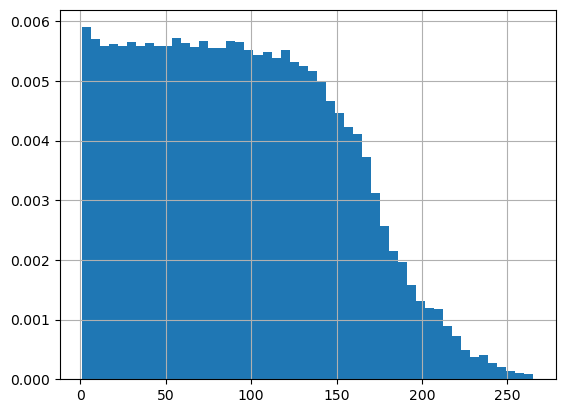

In [6]:
data["target"].hist(bins=50, density=True)
plt.show()

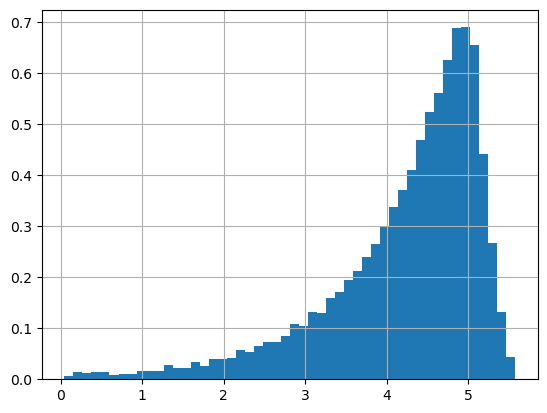

In [7]:
np.log(data["target"]).hist(bins=50, density=True)
plt.show()

Not exactly normal, but better than the original one. If the final model doesn't perform good enough we could try a Box-Cox or Yeo-Johnson transformation.

# Variable Types

In [8]:
data.etherium_before_start = data.etherium_before_start.astype("float64")
print(data.etherium_before_start.dtype)

float64


In [9]:
cat_vars = [var for var in data.columns if data[var].dtype == "O"]

cat_vars = cat_vars + ["index", "place", "Unnamed: 7", "human_behavior_report", "groups", "tracking_times"]
print(len(cat_vars))
print(cat_vars)

20
['when', 'super_hero_group', 'crystal_type', 'expected_start', 'start_process', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened', 'crystal_supergroup', 'Cycle', 'index', 'place', 'Unnamed: 7', 'human_behavior_report', 'groups', 'tracking_times']


In [10]:
data[cat_vars] = data[cat_vars].astype('O')
data.dtypes

index                          object
when                           object
super_hero_group               object
tracking                        int64
place                          object
tracking_times                 object
crystal_type                   object
Unnamed: 7                     object
human_behavior_report          object
human_measure                   int64
crystal_weight                float64
expected_factor_x               int64
previous_factor_x             float64
first_factor_x                float64
expected_final_factor_x       float64
final_factor_x                float64
previous_adamantium           float64
Unnamed: 17                   float64
etherium_before_start         float64
expected_start                 object
start_process                  object
start_subprocess1              object
start_critical_subprocess1     object
predicted_process_end          object
process_end                    object
subprocess1_end                object
reported_on_

In [11]:
num_vars = [var for var in data.columns if var not in cat_vars and var != "target"]

print(len(num_vars))
print(num_vars)

15
['tracking', 'human_measure', 'crystal_weight', 'expected_factor_x', 'previous_factor_x', 'first_factor_x', 'expected_final_factor_x', 'final_factor_x', 'previous_adamantium', 'Unnamed: 17', 'etherium_before_start', 'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone']


# Missing Values

In [12]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
print(vars_with_na)
print(len(vars_with_na))

['crystal_weight', 'first_factor_x', 'final_factor_x', 'previous_adamantium', 'Unnamed: 17', 'etherium_before_start', 'expected_start', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone']
18


In [13]:
data[vars_with_na].isnull().mean().sort_values(ascending=False)

etherium_before_start         0.676264
raw_kryptonite                0.473315
start_critical_subprocess1    0.322566
pure_seastone                 0.108146
argon                         0.037102
previous_adamantium           0.029260
predicted_process_end         0.028207
crystal_weight                0.027856
reported_on_tower             0.021184
opened                        0.021184
subprocess1_end               0.012172
chemical_x                    0.012055
final_factor_x                0.011821
start_subprocess1             0.011704
first_factor_x                0.011470
Unnamed: 17                   0.011470
expected_start                0.003979
process_end                   0.000819
dtype: float64

In [14]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  8
Number of numerical variables with na:  10


In [15]:
num_na

['crystal_weight',
 'first_factor_x',
 'final_factor_x',
 'previous_adamantium',
 'Unnamed: 17',
 'etherium_before_start',
 'chemical_x',
 'raw_kryptonite',
 'argon',
 'pure_seastone']

In [16]:
cat_na

['expected_start',
 'start_subprocess1',
 'start_critical_subprocess1',
 'predicted_process_end',
 'process_end',
 'subprocess1_end',
 'reported_on_tower',
 'opened']

In [17]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    df = df.copy()

    # make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # compare the median target in the observations where data is missing
    # vs the observations where data is available

    # determine median target in the groups 1 and 0,
    # and the standard deviation of the target,
    # and capture the results in a temporary dataset
    tmp = df.groupby(var)['target'].agg(["mean", "std"])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="target", color='green')

    plt.show()

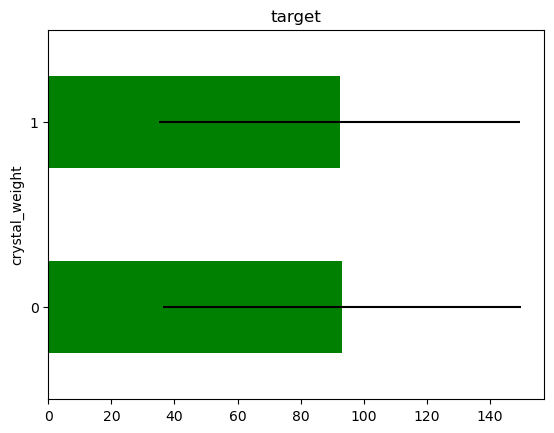

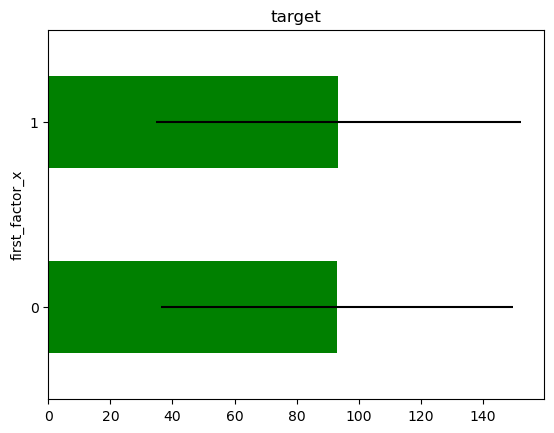

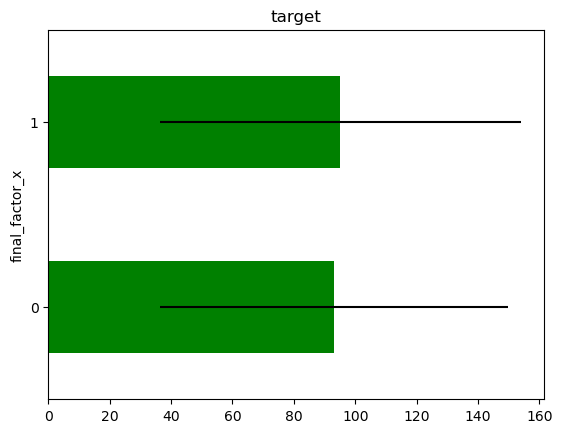

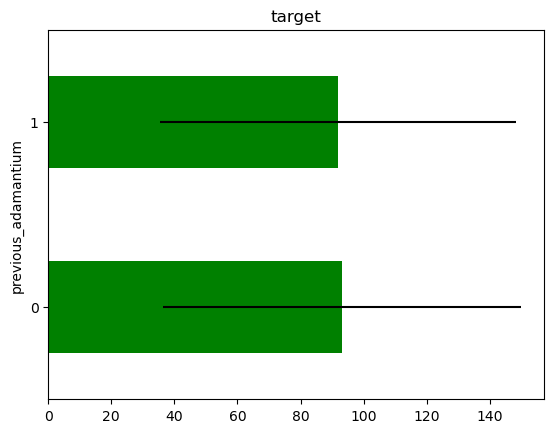

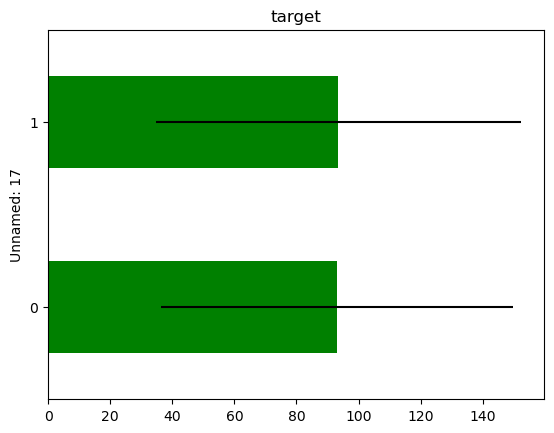

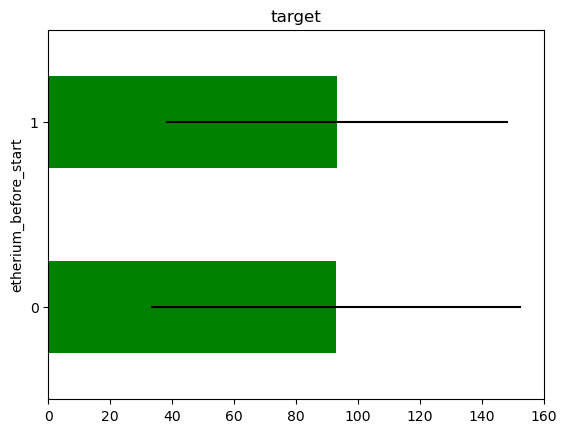

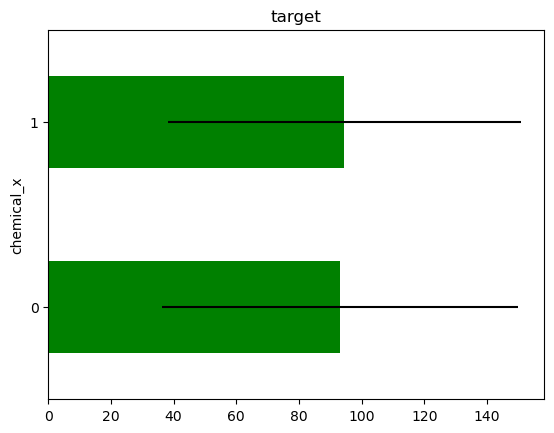

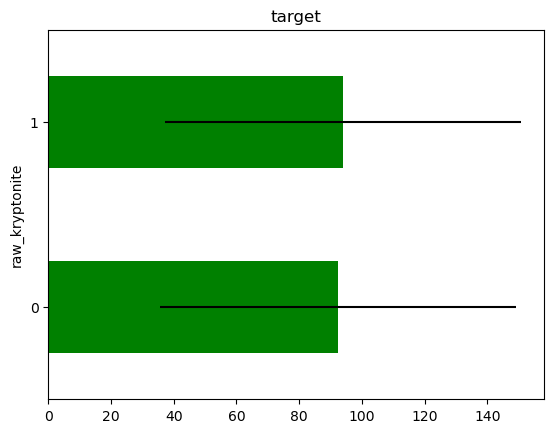

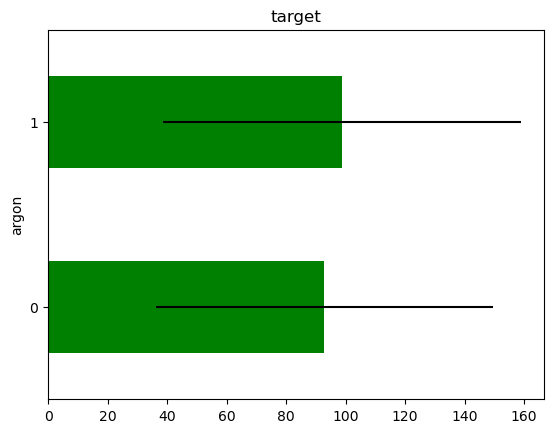

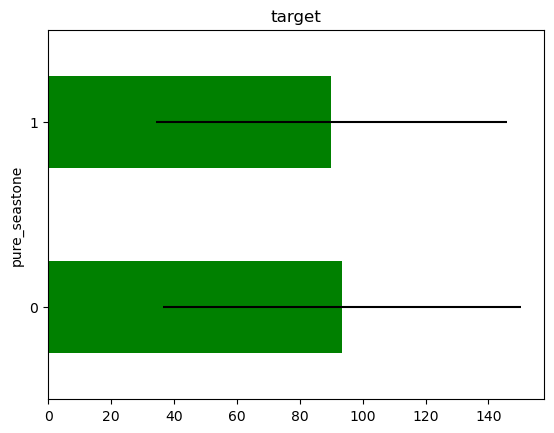

In [18]:
for var in num_na:
    analyse_na_value(data, var)

We can see that missing argon is an indication of a higher target - we will see which features are significant later in our modelling part.

# Temporal variables

In [40]:
from numpy import NaN


temp_vars_datetime = ["expected_start", "start_process", "start_subprocess1", "start_critical_subprocess1", "predicted_process_end", "process_end", "subprocess1_end", "reported_on_tower", "opened"]
temp_vars_date = ["when"]
temp_vars = temp_vars_datetime + temp_vars_date

for var in temp_vars_datetime:
    print(var + ": " + str(pd.to_datetime(data[var], utc=True, errors="coerce").isna().sum()))

for var in temp_vars_datetime:
    data.loc[pd.to_datetime(data[var], utc=True, errors="coerce").isna(),var] = NaN

expected_start: 34
start_process: 0
start_subprocess1: 100
start_critical_subprocess1: 2756
predicted_process_end: 241
process_end: 7
subprocess1_end: 104
reported_on_tower: 181
opened: 392


We can see that we have a lot of missing values or values that cannot be transformed to datetime in the datetime columns. We will later handle this in a pipeline.

In [28]:
data.head(5)

,index,when,super_hero_group,tracking,place,tracking_times,crystal_type,Unnamed: 7,human_behavior_report,human_measure,crystal_weight,expected_factor_x,previous_factor_x,first_factor_x,expected_final_factor_x,final_factor_x,previous_adamantium,Unnamed: 17,etherium_before_start,expected_start,start_process,start_subprocess1,start_critical_subprocess1,predicted_process_end,process_end,subprocess1_end,reported_on_tower,opened,chemical_x,raw_kryptonite,argon,pure_seastone,crystal_supergroup,Cycle,groups,target
0,1,09/07/2020,D,84941,1,1,group 56,1,4,700,350.6301,1610,1630.300049,1595.0,1565.0,1572.0,0.0309,1595.0,NaN,09/07/2020 15:08,09/07/2020 15:11,09/07/2020 15:16,09/07/2020 15:18,09/07/2020 15:49,09/07/2020 15:39,09/07/2020 15:38,09/07/2020 15:53,NaN,21.966667,3570.0,0.0,99.94,0,2ª,0.0,1.233766
1,2,09/07/2020,D,84951,1,1,group 56,2,4,800,347.4298,1609,1638.099976,1608.0,1565.0,1568.0,NaN,1608.0,NaN,09/07/2020 16:15,09/07/2020 16:16,09/07/2020 16:20,09/07/2020 16:22,09/07/2020 16:54,09/07/2020 16:42,09/07/2020 16:41,09/07/2020 16:54,NaN,21.166667,7950.0,0.0,91.49,0,2ª,0.0,2.467532
2,3,09/07/2020,D,84971,1,1,group 56,7,3,700,333.1576,1622,1614.099976,1587.0,1571.0,1576.0,0.0520,1587.0,NaN,09/07/2020 18:22,09/07/2020 18:24,09/07/2020 18:31,09/07/2020 18:33,09/07/2020 19:02,09/07/2020 18:47,09/07/2020 18:47,09/07/2020 18:55,09/07/2020 19:02,15.250000,807.0,0.0,NaN,0,2ª,0.0,3.701299
3,4,09/07/2020,D,84981,1,1,group 27,17,3,700,362.3764,1620,1618.199951,1599.0,1579.0,1590.0,0.2800,1599.0,NaN,09/07/2020 19:14,09/07/2020 19:12,09/07/2020 19:16,NaN,09/07/2020 20:13,09/07/2020 19:37,09/07/2020 19:37,09/07/2020 19:47,09/07/2020 20:20,20.566667,NaN,0.0,509.19,0,2ª,0.0,4.935065
4,5,09/07/2020,B,84991,1,1,group 56,12,3,720,349.7962,1634,1640.500000,1617.0,1583.0,1589.0,0.0406,1617.0,NaN,09/07/2020 20:59,09/07/2020 20:59,09/07/2020 21:03,09/07/2020 21:04,09/07/2020 21:37,09/07/2020 21:35,09/07/2020 21:35,09/07/2020 21:51,09/07/2020 22:09,32.016667,1026.0,0.0,127.79,0,2ª,0.0,6.168831


In [22]:
#  let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in temp_vars]


print('Number of discrete variables: ', len(discrete_vars))
print(discrete_vars)

Number of discrete variables:  0
[]


In [38]:
print(temp_vars_datetime, temp_vars_date)
print((cat_vars))
print(num_vars)

['expected_start', 'start_process', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened'] ['when']
['when', 'super_hero_group', 'crystal_type', 'expected_start', 'start_process', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened', 'crystal_supergroup', 'Cycle', 'index', 'place', 'Unnamed: 7', 'human_behavior_report', 'groups', 'tracking_times']
['tracking', 'human_measure', 'crystal_weight', 'expected_factor_x', 'previous_factor_x', 'first_factor_x', 'expected_final_factor_x', 'final_factor_x', 'previous_adamantium', 'Unnamed: 17', 'etherium_before_start', 'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone']


In [25]:
cont_vars = [var for var in num_vars if len(data[var].unique()) > 200]
len(cont_vars)
cont_vars

['tracking',
 'crystal_weight',
 'previous_factor_x',
 'first_factor_x',
 'final_factor_x',
 'previous_adamantium',
 'Unnamed: 17',
 'etherium_before_start',
 'chemical_x',
 'raw_kryptonite',
 'argon',
 'pure_seastone']

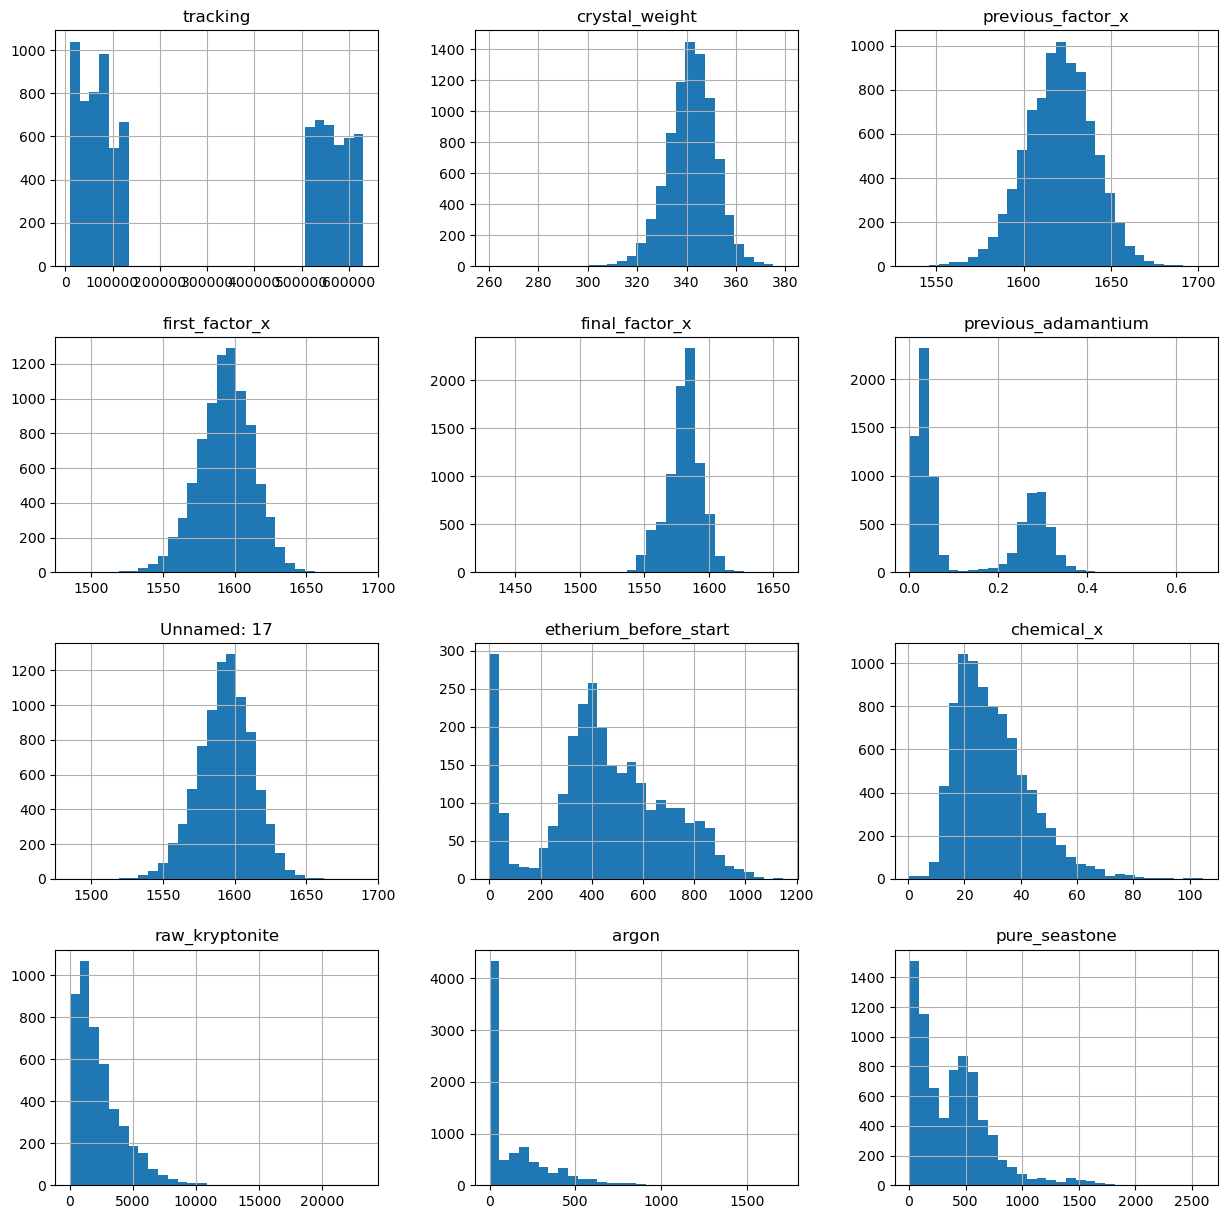

In [26]:
# lets plot histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

We could try a log-transformation on some of the variables later in the pipeline to get a more gaussian behaviour.

Categorical variables

In [41]:
print(temp_vars)

['expected_start', 'start_process', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened', 'when']


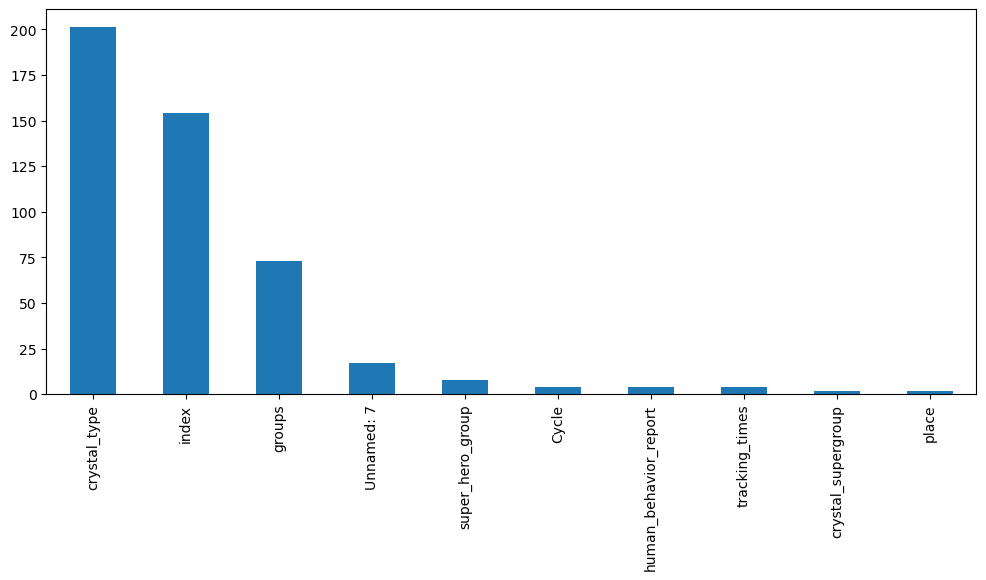

In [42]:
cat_var_wo_temp = [var for var in cat_vars if var not in temp_vars]

data[cat_var_wo_temp].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

In [43]:
qual_vars = []

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

20

In [44]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['target'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_var_wo_temp:
    print(analyse_rare_labels(data, var, 0.01))
    print()

super_hero_group
₢    0.000117
Name: target, dtype: float64

crystal_type
group 0      0.001053
group 10     0.006086
group 100    0.005033
group 101    0.001053
group 102    0.000702
               ...   
group 95     0.000351
group 96     0.001170
group 97     0.002107
group 98     0.000351
group 99     0.002575
Name: target, Length: 173, dtype: float64

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

index
0      0.008427
1      0.008544
2      0.008544
3      0.008544
4      0.008544
         ...   
149    0.000117
150    0.000117
151    0.000117
152    0.000117
153    0.000117
Name: target, Length: 154, dtype: float64

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

groups
3.0     0.009480
20.0    0.008778
40.0    0.009480
50.0    0.008778
64.0    0.008427
74.0    0.008427
Name: target, dtype: float64

tracking_times
3    0.002926
4    0.000351
Name: target, dtype: flo

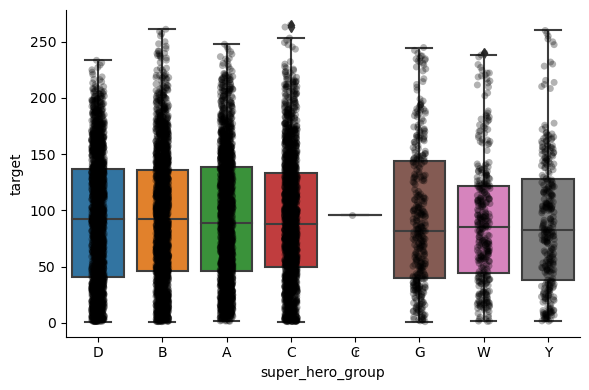

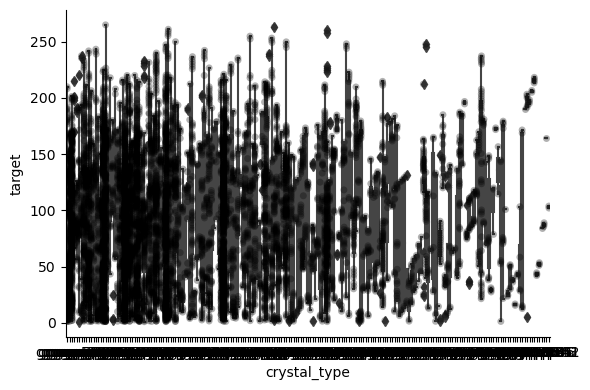

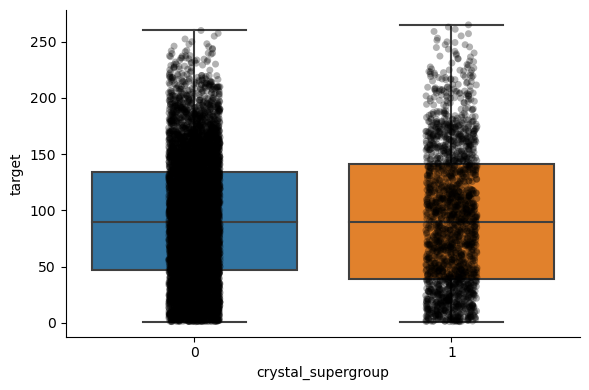

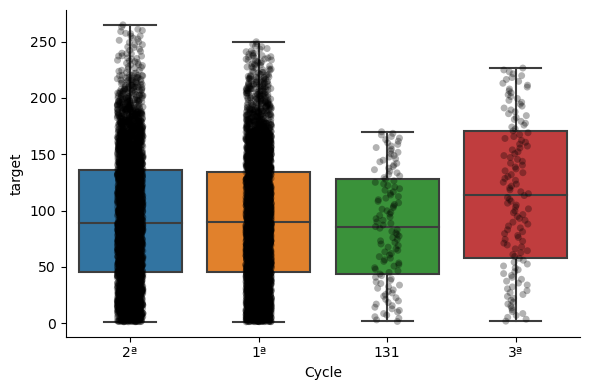

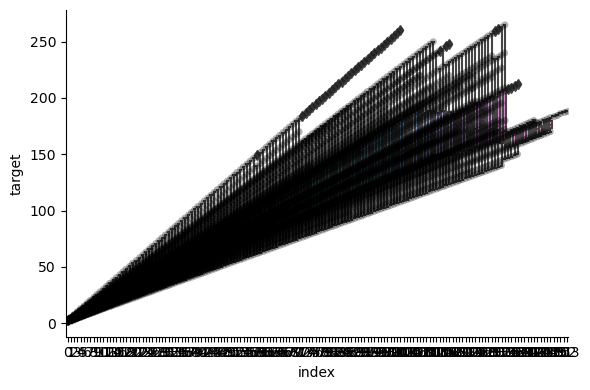

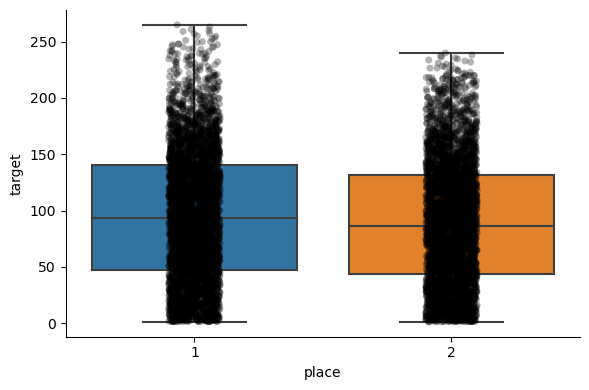

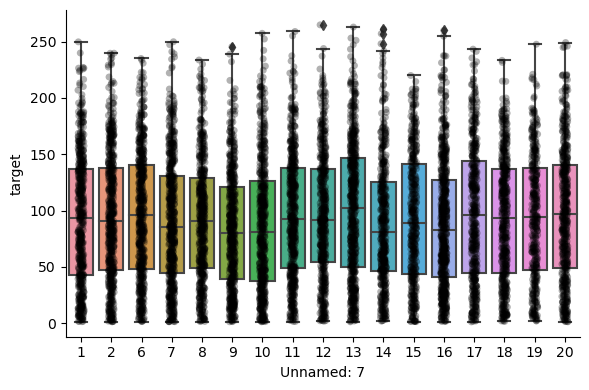

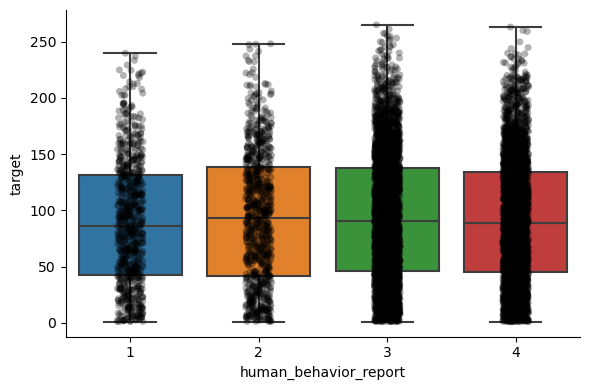

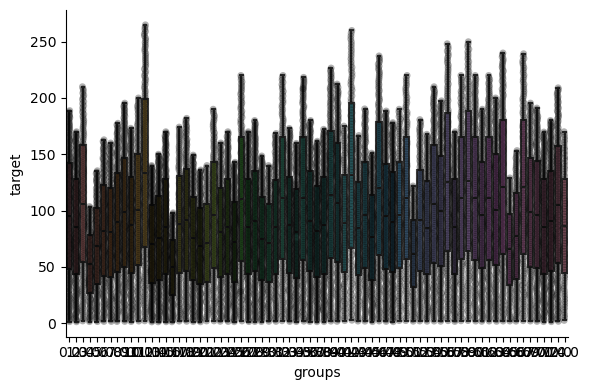

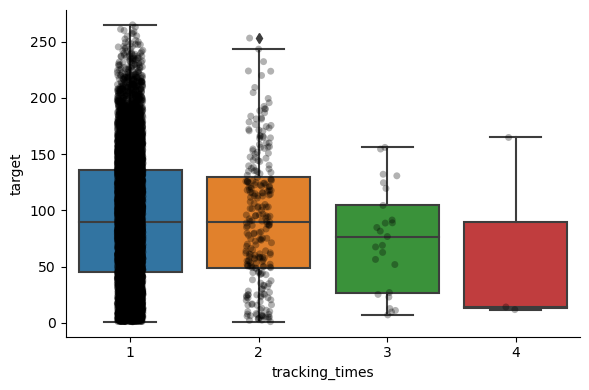

In [45]:
for var in cat_var_wo_temp:
    # make boxplot with Catplot
    sns.catplot(x=var, y='target', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='target', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

We can see that the target goes down when the tracking_times rise, but we have a lot of observations with tracking_times = 1. The number 131 in Cycle looks weird, but we cannot just subtract it. Furthermore with increasing index the target goes up, so this will be a good feature for prediction.